Send an email if you want raw datas  
extract data with its default name `faces.mat` in `__data__` directory

In [9]:
import numpy as np
import scipy.io as sio

In [3]:
 class PCA():
    def __init__(self, n_components):
        self._n_components = n_components
    
    def fit(self, X):
        mean_removed_X = X - X.mean(axis=0)
        covariance_matrix = np.cov(mean_removed_X , rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort eigenvalues and corresponding eigenvectors in descending order
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Select the first n_components, eigen values[0] is for vectors[:, 0]
        eigenvalues = eigenvalues[:self._n_components]
        eigenvectors = eigenvectors[:, :self._n_components]

        self._components = eigenvectors
        self._singular_values = eigenvalues

    def transform(self, X):
        # Project the data onto principal components
        return X @ self._components

In [10]:
data = sio.loadmat('./__data__/faces.mat')

Text(0.5, 1.0, 'Mean Face')

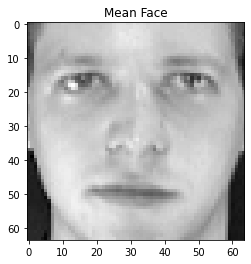

In [22]:
from matplotlib import pyplot as plt
plt.imshow(data['faces'][:,0].reshape(64,64).T,cmap='gray'); 
plt.title('Man Faces')